In [1]:
%cd ..

C:\Users\Test\Geoalert\aeronetlib\aeronet_raster


In [52]:
from aeronet_raster import dataprocessor
from aeronet_raster.dataadapters import numpyadapter
from matplotlib import pyplot as plt
import numpy as np
import importlib
import logging
importlib.reload(dataprocessor)
importlib.reload(numpyadapter)

<module 'aeronet_raster.dataadapters.numpyadapter' from 'C:\\Users\\Test\\Geoalert\\aeronetlib\\aeronet_raster\\aeronet_raster\\dataadapters\\numpyadapter.py'>

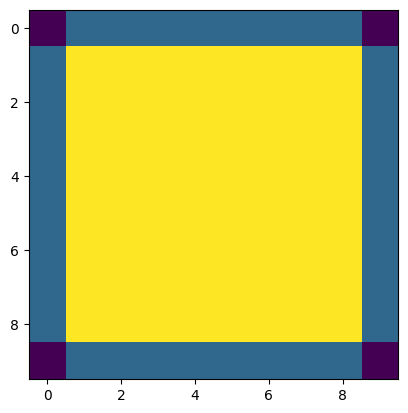

In [55]:
plt.imshow(dataprocessor.get_blend_mask((10, 10), (2, 2)))

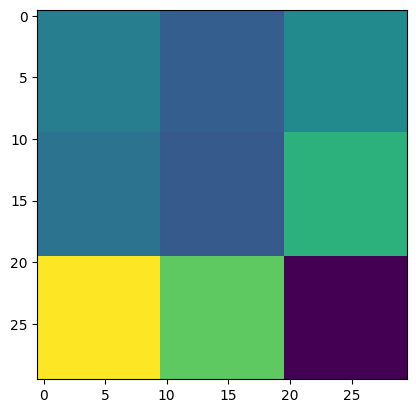

In [54]:
inp = numpyadapter.NumpyReader(np.zeros((1, 30, 30)))
out = numpyadapter.NumpyWriter(np.zeros((1, 30, 30)))

dataprocessor.process_image(src = inp,
                            src_sample_size = 10,
                            src_margin = 0,
                            processor = lambda x: x+np.random.rand(),
                            dst = out,
                            dst_sample_size = 10,
                            dst_margin = 0,
                            dst_margin_mode = 'crop')
plt.imshow(out._data[0])

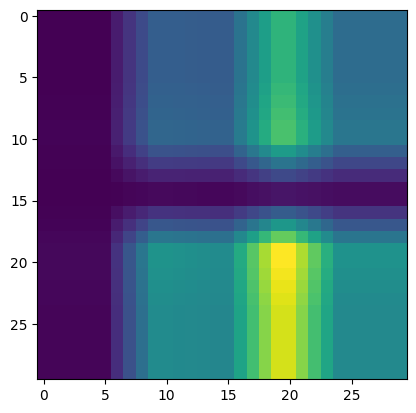

In [61]:
inp = numpyadapter.NumpyReader(np.zeros((1, 30, 30)))
out = numpyadapter.NumpyWriter(np.zeros((1, 30, 30)))

dataprocessor.process_image(src = inp,
                            src_sample_size = 18,
                            src_margin = 4,
                            processor = lambda x: x+np.random.rand(),
                            dst = out,
                            dst_sample_size = 18,
                            dst_margin = 4,
                            dst_margin_mode = 'crossfade')
plt.imshow(out._data[0])